# Dissimilarity based on semi-variogram analysis

Introduced by Matheron (1963), the semi-variogram measure the dissimilarity of the values taken by random variables at different spatial locations as a function of a distance. Assuming stationarity and isotropy, it can be written as:
$$
\gamma(h)={{1}\over{2}} E \left[ Z(s)-Z(s+h) \right]^2 \text{, where }s\text{ denotes a spatial location, }h \text{ denotes a distance and }Z \text{ is the random variable of interest.}
$$

Using spatial samples of a random variable, it is then possible to compute an experimental or empirical semi-variogram over $n$ lags of width $ \delta $ as follows:

$\hat{\gamma}(h_i) = {{1}\over{2 N_i}} \sum \limits _{(j,k)} |Z(s_j)-Z(s_k)|^2 $, where $h_i= (i-{{1}\over{2}})\delta $ is the centre of the $ i^{th}$ lag, $1\leq i \leq n$ and $N_i$ is the number of pairs $(j,k)$ of points such that $(i-1)\delta\leq||Z(s_j)-Z(s_k)||\leq i \delta$.


Given two empirical semi-variograms $\hat{\gamma_1}$ and $\hat{\gamma_2}$, we propose to use the following distance:

$ ||\hat{\gamma_1} - \hat{\gamma_2} ||_p = \left( {{1}\over{\sum \limits_{1\leq i \leq n} {{1}\over{h_i}}}} \sum \limits_{1\leq i \leq n} {{1}\over{h_i}} |\hat{\gamma_1}(h_i) - \hat{\gamma_2}(h_i)|^p \right)^{{{1}\over{p}}}$, where $p=2$ in the following illustrations.



### Reference
Matheron, G. (1963). Principles of geostatistics. Economic geology, 58(8), 1246-1266. https://doi.org/10.2113/gsecongeo.58.8.1246 

In [1]:
# import modules
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import manifold
import pickle
from loopUI import dist_experimental_variogram, mxdist_experimental_variogram

picklefilenamesemivariogram = "./pickledata/synthetic-case-semivariogram.pickle"
picklefilenamedata = "./pickledata/synthetic-case-data.pickle"

# plotting parameters
slice_ix=0
slice_iy=0
slice_iz=7
aspectratio = 1 # !! in pixels !!
sample_num1 = 0
sample_num2 = 10

# 2PS based dissimilarity parameters
seed = 65432
max3Dnbsamples = int(0.6E3)
max2Dnbsamples = int(0.3E3)
pnorm = 2 
nblags=12

# import data
with open(picklefilenamedata, 'rb') as f:
    [lithocode_100,lithocode_50A,lithocode_50B,scalarfield_100,scalarfield_50A,
     scalarfield_50B,nx,ny,nz,nbsamples,clblab,clblabsf] = pickle.load(f)

yyy,zzz,xxx=np.meshgrid(np.arange(1,ny+1),np.flip(np.arange(1,nz+1)),np.arange(1,nx+1))
xx=xxx[0,:,:]
yy=yyy[0,:,:]
zz=zzz[0,:,:]
maxh3D = np.sqrt(nx**2+ny**2+nz**2)/3
maxh2D = np.sqrt(nx**2+ny**2)/3

lithocode_all = np.reshape(np.stack((lithocode_100,lithocode_50A,lithocode_50B),axis=4),(nz,ny,nx,nbsamples*3),order='F')
scalarfield_all = np.reshape(np.stack((scalarfield_100,scalarfield_50A,scalarfield_50B),axis=4),(nz,ny,nx,nbsamples*3),order='F')

## 3D continuous case

08-Nov-2021 (13:10:28) - COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY START
img1
3D data - experimental semi-variogram computation
img2
3D data - experimental semi-variogram computation
distance computation
weights: [0.33,0.14,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]


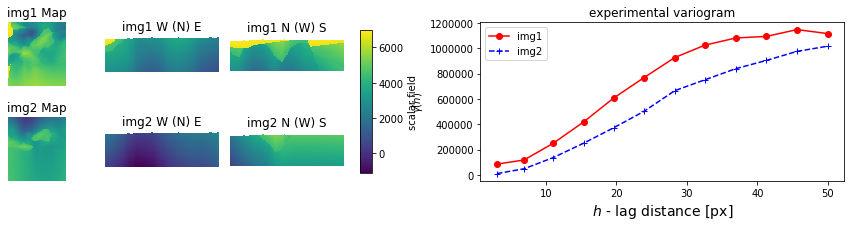

08-Nov-2021 (13:10:32) - COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY END


In [2]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY START")
img1 = scalarfield_all[:,:,:,sample_num1] # for illustration, we consider the density field of random sample #9
img2 = scalarfield_all[:,:,:,sample_num2] # for illustration, we consider the density field of random sample #2
verb=True
plot=True
label="scalar field"
dist3Dconti = dist_experimental_variogram(img1,img2,xxx,yyy,zzz,nblags,maxh3D,max3Dnbsamples,pnorm,seed,categ=False,label=label,verb=verb,plot=plot,slice_iz=slice_iz)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY END")

## 2D continuous case

08-Nov-2021 (13:10:32) - COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY START
img1
2D data - experimental semi-variogram computation
img2
2D data - experimental semi-variogram computation
distance computation
weights: [0.34,0.15,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]


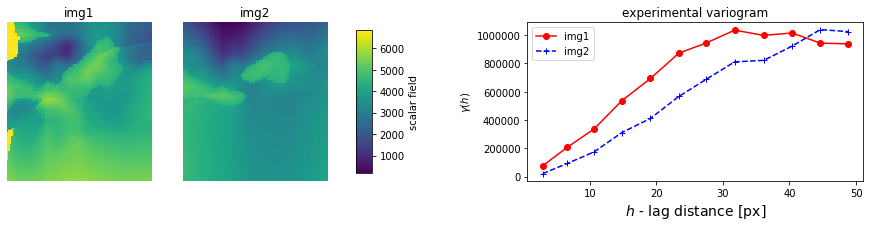

08-Nov-2021 (13:10:33) - COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY END


In [3]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY START")
img1 = np.reshape(scalarfield_all[slice_iz,:,:,sample_num1],(ny,nx)) # for illustration, we consider the density field of random sample 1
img2 = np.reshape(scalarfield_all[slice_iz,:,:,sample_num2],(ny,nx)) # for illustration, we consider the density field of random sample 2
verb=True
plot=True
label="scalar field"
dist2Dconti = dist_experimental_variogram(img1,img2,xx,yy,zz,nblags,maxh2D,max2Dnbsamples,pnorm,seed,categ=False,label=label,verb=verb,plot=plot)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE DENSITY END")

## 3D discrete case

In the discrete case, empirical semi-variograms are computed for each class of value $c$

Given the pairs of empirical semi-variograms $\hat{\gamma_1^c}$ and $\hat{\gamma_2^c}$ for each class of value $c$, we propose to use the following distance:

$ ||\hat{\gamma_1} - \hat{\gamma_2} ||_p = \left( {{1}\over{N_c\sum \limits_{i=1}^{n} {{1}\over{h_i}}}} \sum \limits_{c=1}^{N_c} \sum \limits_{i=1}^{n} {{1}\over{h_i}} |\hat{\gamma_1^c}(h_i) - \hat{\gamma_2^c}(h_i)|^p \right)^{{{1}\over{p}}}$, where $p=2$ in the following illustrations.


08-Nov-2021 (13:10:33) - COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE START
img1 lithocode$ 0.0
3D data - experimental semi-variogram computation
img2 lithocode$ 0.0
3D data - experimental semi-variogram computation
weights: [0.31,0.14,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 0.0: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


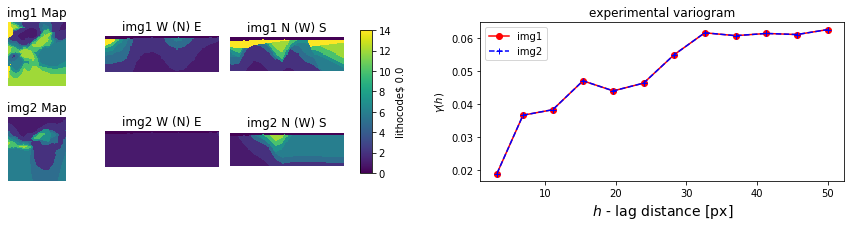

img1 lithocode$ 1.0
3D data - experimental semi-variogram computation
img2 lithocode$ 1.0
3D data - experimental semi-variogram computation
weights: [0.31,0.14,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 1.0: [0.         0.04321591 0.         0.         0.         0.
 0.         0.         0.        ]


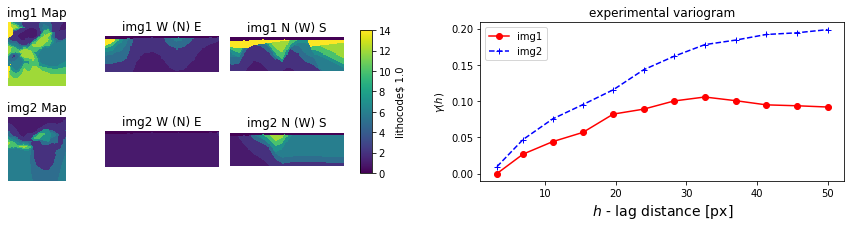

img1 lithocode$ 2.0
3D data - experimental semi-variogram computation
img2 lithocode$ 2.0
3D data - experimental semi-variogram computation
weights: [0.31,0.14,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 2.0: [0.         0.04321591 0.04205958 0.         0.         0.
 0.         0.         0.        ]


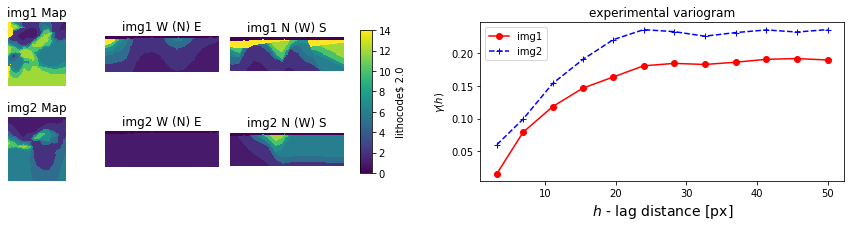

img1 lithocode$ 5.0
3D data - experimental semi-variogram computation
img2 lithocode$ 5.0
3D data - experimental semi-variogram computation
weights: [0.31,0.14,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 5.0: [0.         0.04321591 0.04205958 0.01429639 0.         0.
 0.         0.         0.        ]


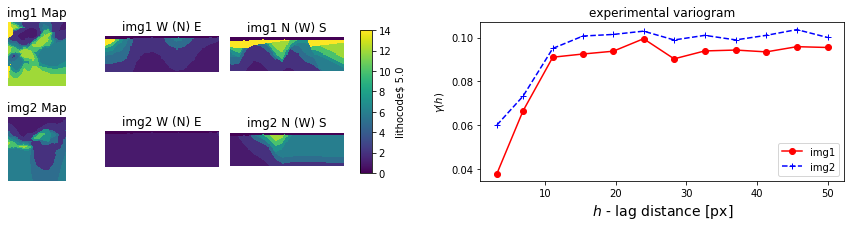

img1 lithocode$ 6.0
3D data - experimental semi-variogram computation
img2 lithocode$ 6.0
3D data - experimental semi-variogram computation
weights: [0.31,0.14,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 6.0: [0.         0.04321591 0.04205958 0.01429639 0.03835895 0.
 0.         0.         0.        ]


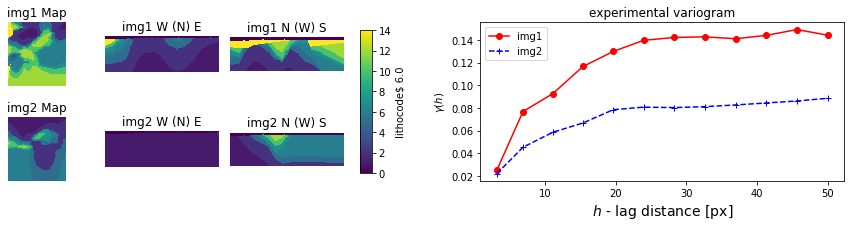

img1 lithocode$ 7.0
3D data - experimental semi-variogram computation
img2 lithocode$ 7.0
3D data - experimental semi-variogram computation
weights: [0.31,0.14,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 7.0: [0.         0.04321591 0.04205958 0.01429639 0.03835895 0.02401958
 0.         0.         0.        ]


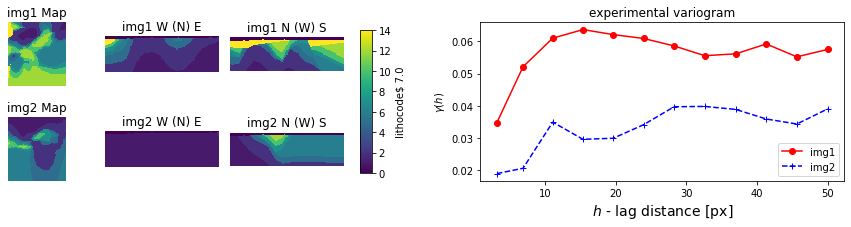

img1 lithocode$ 10.0
3D data - experimental semi-variogram computation
img2 lithocode$ 10.0
3D data - experimental semi-variogram computation
weights: [0.31,0.14,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 10.0: [0.         0.04321591 0.04205958 0.01429639 0.03835895 0.02401958
 0.06948372 0.         0.        ]


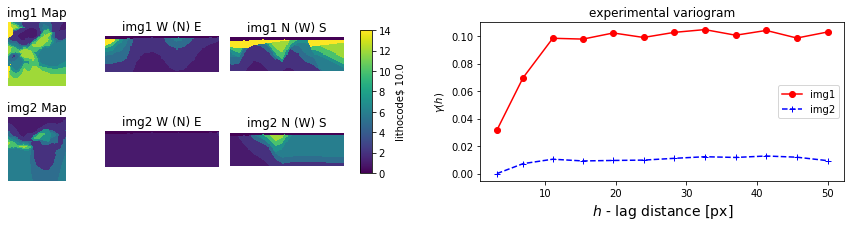

img1 lithocode$ 12.0
3D data - experimental semi-variogram computation
img2 lithocode$ 12.0
3D data - experimental semi-variogram computation
weights: [0.31,0.14,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 12.0: [0.         0.04321591 0.04205958 0.01429639 0.03835895 0.02401958
 0.06948372 0.05891555 0.        ]


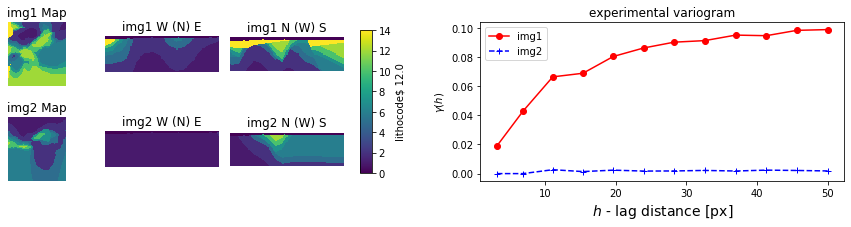

img1 lithocode$ 14.0
3D data - experimental semi-variogram computation
img2 lithocode$ 14.0
3D data - experimental semi-variogram computation
weights: [0.31,0.14,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 14.0: [0.         0.04321591 0.04205958 0.01429639 0.03835895 0.02401958
 0.06948372 0.05891555 0.00562445]


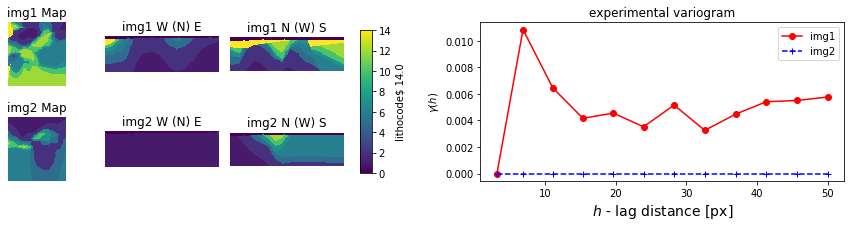

08-Nov-2021 (13:11:08) - COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE END


In [4]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE START")
img1 = lithocode_all[:,:,:,sample_num1] # for illustration, we consider the density field of random sample #9
img2 = lithocode_all[:,:,:,sample_num2] # for illustration, we consider the density field of random sample #2
verb=True
plot=True
label="lithocode$"
dist3Dcateg = dist_experimental_variogram(img1,img2,xxx,yyy,zzz,nblags,maxh3D,max3Dnbsamples,pnorm,seed,categ=True,label=label,verb=verb,plot=plot,slice_iz=slice_iz)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE END")

## 2D discrete case

08-Nov-2021 (13:11:08) - COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE START
img1 lithocode$ 1.0
2D data - experimental semi-variogram computation
img2 lithocode$ 1.0
2D data - experimental semi-variogram computation
weights: [0.34,0.15,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 1.0: [0.01826161 0.         0.         0.         0.         0.
 0.         0.        ]


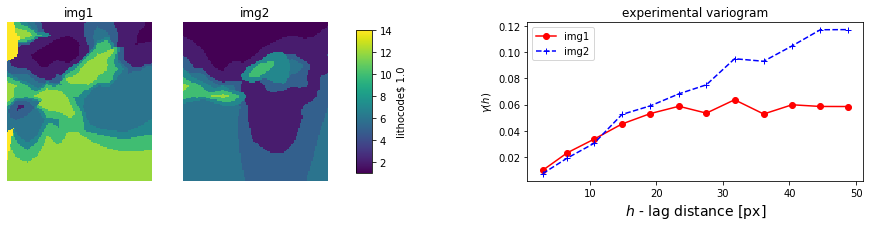

img1 lithocode$ 2.0
2D data - experimental semi-variogram computation
img2 lithocode$ 2.0
2D data - experimental semi-variogram computation
weights: [0.34,0.15,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 2.0: [0.01826161 0.05897242 0.         0.         0.         0.
 0.         0.        ]


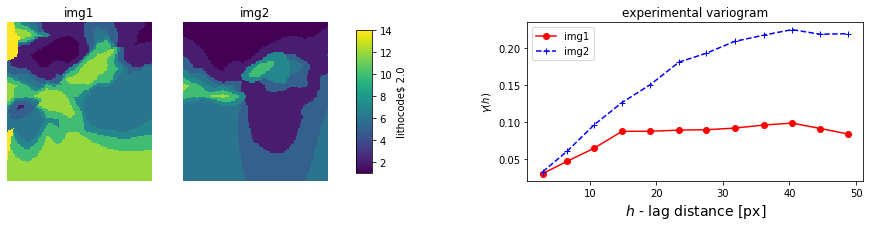

img1 lithocode$ 5.0
2D data - experimental semi-variogram computation
img2 lithocode$ 5.0
2D data - experimental semi-variogram computation
weights: [0.34,0.15,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 5.0: [0.01826161 0.05897242 0.0511876  0.         0.         0.
 0.         0.        ]


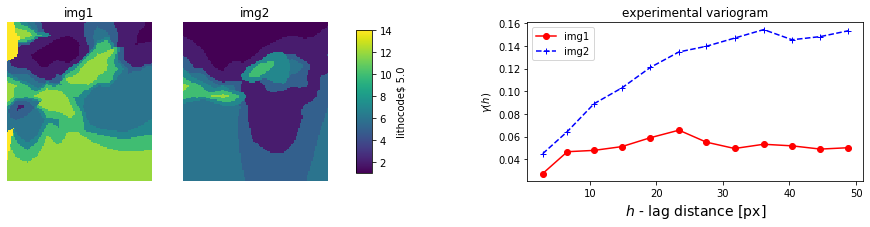

img1 lithocode$ 6.0
2D data - experimental semi-variogram computation
img2 lithocode$ 6.0
2D data - experimental semi-variogram computation
weights: [0.34,0.15,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 6.0: [0.01826161 0.05897242 0.0511876  0.01271168 0.         0.
 0.         0.        ]


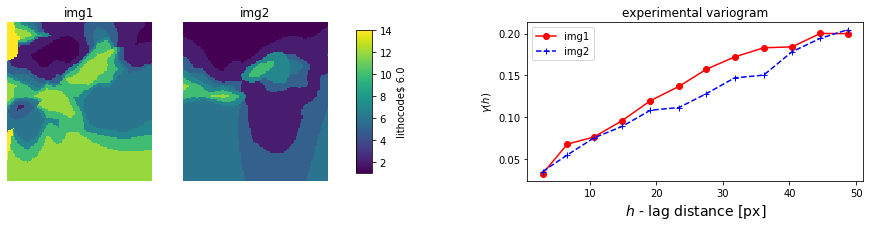

img1 lithocode$ 7.0
2D data - experimental semi-variogram computation
img2 lithocode$ 7.0
2D data - experimental semi-variogram computation
weights: [0.34,0.15,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 7.0: [0.01826161 0.05897242 0.0511876  0.01271168 0.01459877 0.
 0.         0.        ]


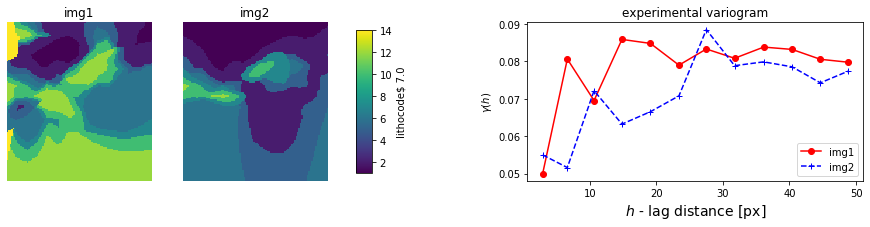

img1 lithocode$ 10.0
2D data - experimental semi-variogram computation
img2 lithocode$ 10.0
2D data - experimental semi-variogram computation
weights: [0.34,0.15,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 10.0: [0.01826161 0.05897242 0.0511876  0.01271168 0.01459877 0.07353905
 0.         0.        ]


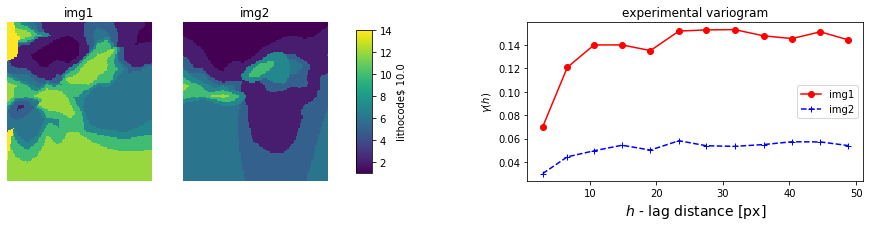

img1 lithocode$ 12.0
2D data - experimental semi-variogram computation
img2 lithocode$ 12.0
2D data - experimental semi-variogram computation
weights: [0.34,0.15,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 12.0: [0.01826161 0.05897242 0.0511876  0.01271168 0.01459877 0.07353905
 0.10687075 0.        ]


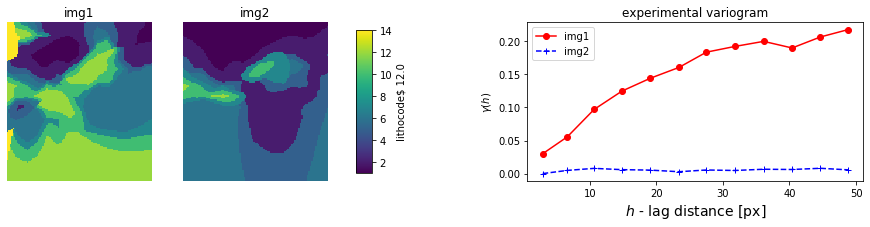

img1 lithocode$ 14.0
2D data - experimental semi-variogram computation
img2 lithocode$ 14.0
2D data - experimental semi-variogram computation
weights: [0.34,0.15,0.09,0.07,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.02]
distance lithocode$ 14.0: [0.01826161 0.05897242 0.0511876  0.01271168 0.01459877 0.07353905
 0.10687075 0.00641591]


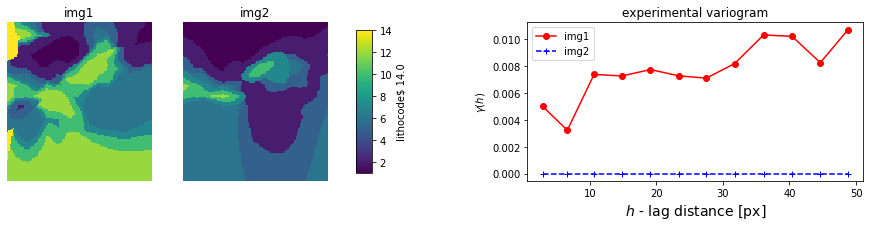

08-Nov-2021 (13:11:18) - COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE END


In [5]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE START")
img1 = np.reshape(lithocode_all[slice_iz,:,:,sample_num1],(ny,nx)) # for illustration, we consider the density field of random sample 1
img2 = np.reshape(lithocode_all[slice_iz,:,:,sample_num2],(ny,nx)) # for illustration, we consider the density field of random sample 2
verb=True
plot=True
label="lithocode$"
dist2Dcateg = dist_experimental_variogram(img1,img2,xx,yy,zz,nblags,maxh2D,max2Dnbsamples,pnorm,seed,categ=True,label=label,verb=verb,plot=plot)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM DISTANCE LITHOCODE END")

## Compute for all data and sample pairs<span style='color:red'>\*</span>
<span style='color:red'>**WARNING: IT COULD TAKE AROUND 10 MINUTES. PRECOMPUTED RESULTS ALREADY AVAILABLE IN THE PICKLE FOLDER**</span>

In [6]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM BASED DIST ALL START")
dist_2ps_lc = np.zeros((nbsamples*3,nbsamples*3))
dist_2ps_sf = np.zeros((nbsamples*3,nbsamples*3))
categval = np.unique(lithocode_all)
dist_2ps_lc =  mxdist_experimental_variogram(lithocode_all,xxx,yyy,zzz,nblags,maxh3D,max3Dnbsamples,pnorm,seed,categ=True,categval=categval,verb=False)
dist_2ps_sf = mxdist_experimental_variogram(scalarfield_all,xxx,yyy,zzz,nblags,maxh3D,max3Dnbsamples,pnorm,seed,categ=False,verb=False)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING SEMI-VARIOGRAM BASED DIST ALL END")

08-Nov-2021 (13:11:18) - COMPUTING SEMI-VARIOGRAM BASED DIST ALL START
08-Nov-2021 (13:19:24) - COMPUTING SEMI-VARIOGRAM BASED DIST ALL END


## Some plots in a Multi-Dimensional Scaling (reduced, 2D) space<span style='color:red'>\*</span>
<span style='color:red'>**\*if all pairs of distances have been computed** </span>

08-Nov-2021 (13:19:24) - COMPUTING 2D MDS REPRESENTATION START


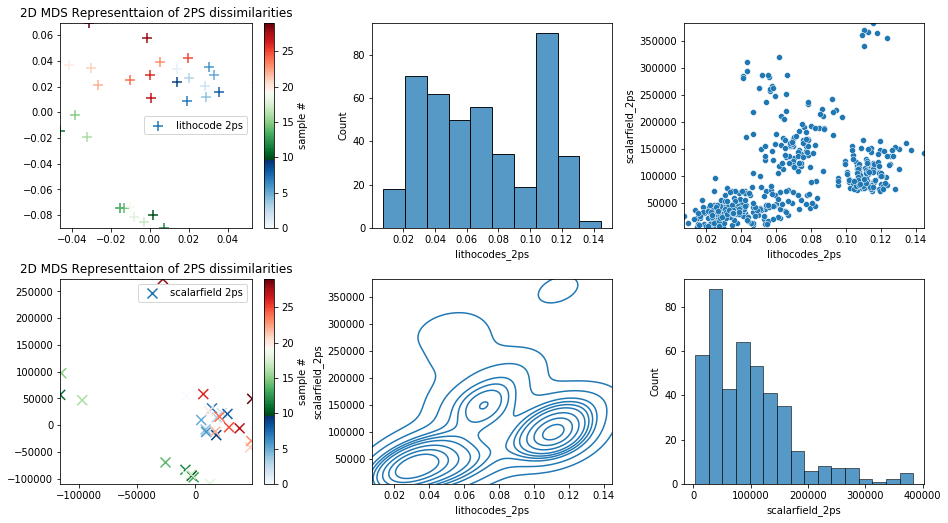

08-Nov-2021 (13:19:26) - COMPUTING 2D MDS REPRESENTATION END


In [7]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION START")
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)

mdspos_lc = mds.fit(dist_2ps_lc).embedding_
mdspos_sf = mds.fit(dist_2ps_sf).embedding_

s_id = np.arange(nbsamples*3)
# Plot concentric circle dataset
colors1 = plt.cm.Blues(np.linspace(0., 1, 512))
colors2 = np.flipud(plt.cm.Greens(np.linspace(0, 1, 512)))
colors3 = plt.cm.Reds(np.linspace(0, 1, 512))
colors = np.vstack((colors1, colors2, colors3))
mycmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

ix=np.tril_indices(nbsamples*3,k=-1)
df= pd.DataFrame({'lithocodes_2ps':dist_2ps_lc[ix], 'scalarfield_2ps':dist_2ps_sf[ix]})

lcmin = np.amin(dist_2ps_lc[ix]) 
lcmax = np.amax(dist_2ps_lc[ix])
sfmin = np.amin(dist_2ps_sf[ix]) 
sfmax = np.amax(dist_2ps_sf[ix])

lcMDSxmin = np.min(mdspos_lc[:,0])
lcMDSxmax = np.max(mdspos_lc[:,0])
lcMDSymin = np.min(mdspos_lc[:,1])
lcMDSymax = np.max(mdspos_lc[:,1])

sfMDSxmin = np.min(mdspos_sf[:,0])
sfMDSxmax = np.max(mdspos_sf[:,0])
sfMDSymin = np.min(mdspos_sf[:,1])
sfMDSymax = np.max(mdspos_sf[:,1])

s = 100
fig = plt.figure()
plt.subplot(231)
plt.title('2D MDS Representtaion of 2PS dissimilarities')
plt.scatter(mdspos_lc[:, 0], mdspos_lc[:, 1], c=s_id,cmap=mycmap, s=s, label='lithocode 2ps', marker='+')
plt.xlim(lcMDSxmin,lcMDSxmax)
plt.ylim(lcMDSymin,lcMDSymax)
plt.legend(scatterpoints=1, loc='best', shadow=False)
cbar = plt.colorbar()
cbar.set_label('sample #')
plt.subplot(234)
plt.title('2D MDS Representtaion of 2PS dissimilarities')
plt.scatter(mdspos_sf[:, 0], mdspos_sf[:, 1], c=np.arange(nbsamples*3),cmap=mycmap, s=s, label='scalarfield 2ps', marker='x')
plt.xlim(sfMDSxmin,sfMDSxmax)
plt.ylim(sfMDSymin,sfMDSymax)
plt.legend(scatterpoints=1, loc='best', shadow=False)
cbar = plt.colorbar()
cbar.set_label('sample #')
plt.subplot(232)
sns.histplot(df.lithocodes_2ps)
plt.subplot(233)
sns.scatterplot(x=df.lithocodes_2ps,y=df.scalarfield_2ps)
plt.xlim(lcmin,lcmax)
plt.ylim(sfmin,sfmax)
plt.subplot(235)
sns.kdeplot(x=df.lithocodes_2ps,y=df.scalarfield_2ps)
plt.xlim(lcmin,lcmax)
plt.ylim(sfmin,sfmax)
plt.subplot(236)
sns.histplot(df.scalarfield_2ps)
fig.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.6, wspace=0.3, hspace=0.25)
plt.show()

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION END")

## Save indicators<span style='color:red'>\*</span>
<span style='color:red'>**\*if all pairs of distances have been computed** </span>

In [8]:
with open(picklefilenamesemivariogram, 'wb') as f:
    pickle.dump([dist_2ps_lc,dist_2ps_sf], f)